In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import homogeneity_score
import pandas as pd
import plotly
import plotly.graph_objs as go
from sklearn.manifold import TSNE

In [ ]:
df1 = pd.read_csv('Second_week_first_dataset.csv', index_col=0)
df2 = pd.read_csv('Second_week_second_dataset.csv', index_col=0)
df3 = pd.read_csv('Second_week_third_dataset.csv', index_col=0)

In [ ]:
print(df1.shape, df2.shape, df3.shape)

(1000, 2) (1000, 3) (150, 6)


#Первый пошел

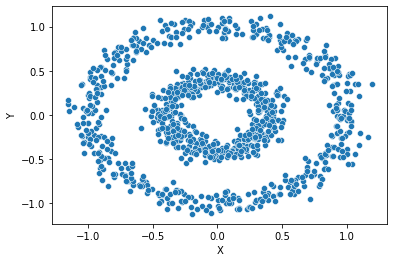

In [ ]:
sns.scatterplot(data=df1, x='X', y='Y')

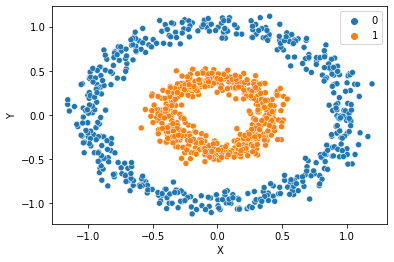

In [ ]:
cls = AgglomerativeClustering(linkage='single')
cls.fit(df1)
sns.scatterplot(data=df1, x='X', y='Y', hue=cls.labels_)

In [ ]:
homogeneity_score

#Второй пошел

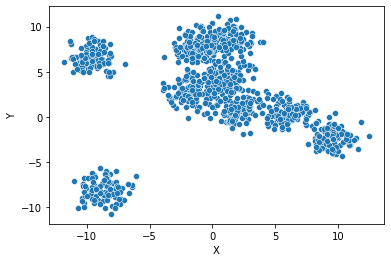

In [ ]:
sns.scatterplot(data=df2, x='X', y='Y')

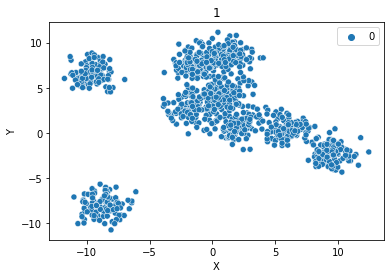

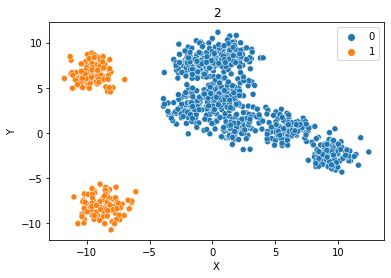

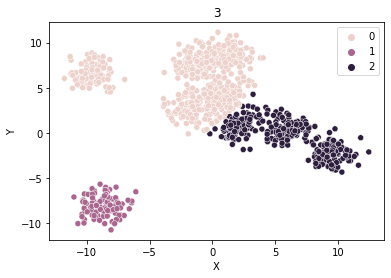

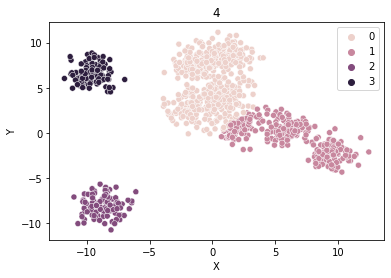

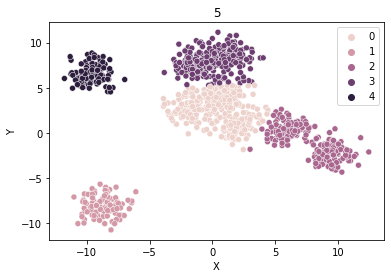

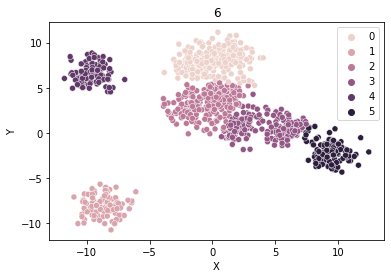

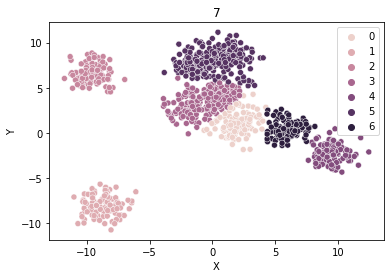

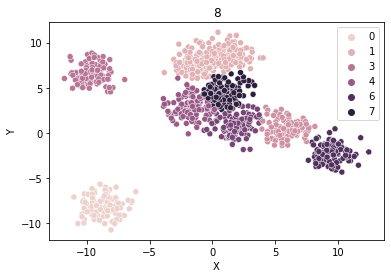

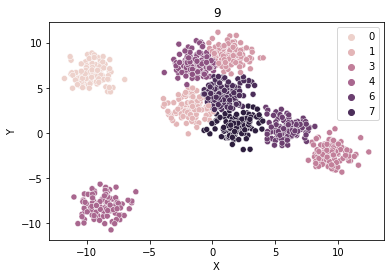

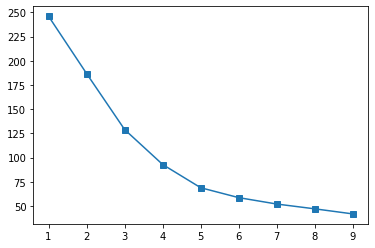

In [ ]:
#КОСТЫЫЫЛЬ для выбора числа класетров. Ну ладно, я увидел в чате, что тут их не 3, но честно не смотрел сколько. по моему глазу кажется, их должно быть 7
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df2)
    inertia.append(np.sqrt(kmeans.inertia_))
    sns.scatterplot(data=df2, x='X', y='Y', hue=kmeans.labels_)
    plt.title(k)
    plt.show()

plt.plot(range(1, 10), inertia, marker='s');

plt.show()

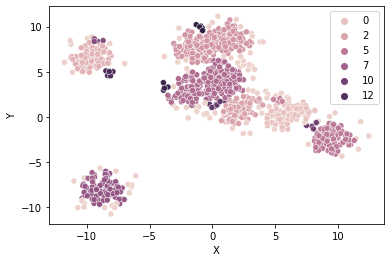

In [ ]:
#Окей берем 6 или 7. Научный подход, тут ничего не скажешь
#научный подход 2. Выбрать модель о которой говорят, что она заебись

DBcls = DBSCAN()
DBcls.fit(df2)
sns.scatterplot(data=df2, x='X', y='Y', hue=DBcls.labels_)
# не фортануло, чет сложна

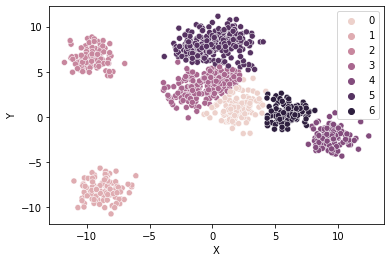

In [ ]:
#Научный подход завершение

kmeans404 = KMeans(n_clusters=7, random_state=42).fit(df2)
sns.scatterplot(data=df2, x='X', y='Y', hue=kmeans404.labels_)
plt.show()

#3й пошел

In [ ]:
X = df3.drop(columns='Species')
y = df3['Species']

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(X)

In [ ]:
test = pd.DataFrame({'y_pred' : kmeans3.labels_, 'y_test' : y})
test.dropna(inplace=True)
test['y_test'] = test['y_test'].astype(int)

print(homogeneity_score(test['y_test'], test['y_pred']))

0.7372563757863704


In [ ]:
markercolor = X['PetalWidthCm']

fig1 = go.Scatter3d(x=X['SepalLengthCm'],
                    y=X['SepalWidthCm'],
                    z=X['PetalLengthCm'],
                    marker=dict(color=markercolor,
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

mylayout = go.Layout(scene=dict(xaxis=dict( title="curb-weight"),
                                yaxis=dict( title="horsepower"),
                                zaxis=dict(title="price")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("4DPlot.html"))

'4DPlot.html'

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.511787
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.942032
[t-SNE] KL divergence after 1000 iterations: 0.122824


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

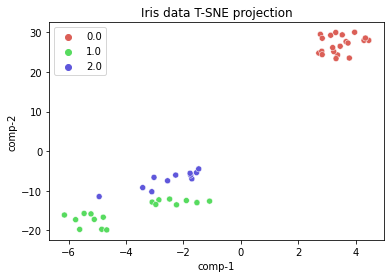

In [ ]:
#Не засчитывай, убьет((

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X) 
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection") 